<a href="https://colab.research.google.com/github/ckrazaditya/github/blob/master/Data_Analysis_2020_07_17_Chandramani_Lesson0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 0: COVID-19 Outbreak Analysis

### Overview

In a tweet on 11 March 2020, WHO declared COVID-19 (or coronavirus) a pandemic. A pandemic is a disease spread over the world.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/who-coronavirus-pandemic.png' width=500>

Here's a link to the tweet: https://twitter.com/WHO/status/1237777021742338049

You can look at the following live dashboard to see the real-time updates.

[COVID-19 Live Dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)

In line with this pandemic, in this class, to understand the spread of the disease, we are going to look at 

- How many people get affected by coronavirus every day?

- Which countries have flattened the curve? In other words, which countries have controlled the rate of spread of COVID-19?

---

### Teacher-Student Activities

**Q:** What will you create in this class?

- Line Plots

- Cartograms using Folium Maps 

- Bivariate Bar Charts

Let's get started.


---

#### Activity 1: Download The Datasets

First of all, we need to download the data. Here's the link to the data source. It is a GitHub repository. Coders/programmers across the world create GitHub repositories for their codes so that they can download and upload their work anytime from anywhere. Essentially, it's like carrying data in a portable storage device.

[COVID-19 Data Source](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)


<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/github_repo.png'>

**At this point, the student should share/present their screen with the teacher.**

In [ ]:
# Student Action: Run the code below by either clicking on the play button or by hitting the 'shift + enter' keys together.
# Cloning the GitHub repository.
!git clone https://github.com/CSSEGISandData/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 40100 (delta 5), reused 10 (delta 5), pack-reused 40086
Receiving objects: 100% (40100/40100), 295.13 MiB | 31.99 MiB/s, done.
Resolving deltas: 100% (24533/24533), done.
Checking out files: 100% (502/502), done.


The repository is saved in the notebook. You can click on the folder icon on the left-hand side of the notebook to access the `COVID-19` repository (or folder)

---

#### Activity 2: Importing Modules, Dataset Paths, Pandas DataFrames & Series

Now, we need to get the path of the datasets:

1. Click on the folder icon on the left-hand side of the notebook.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/get_data_1.png' width=700>

2. Click on the tiny arrow on the left-hand side of the `COVID-19` folder.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/get_data_2.png' width=400>

3. Click on the tiny arrow in the left-hand side of the `csse_covid_19_data` folder.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/get_data_3.png' width=400>

4. Click on the tiny arrow in the left-hand side of the `csse_covid_19_time_series` folder.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/get_data_4.png' width=400>

   You should be able to see the CSV files which contain data for this class.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/get_data_5.png' width=400>

5. Right-click on each of the CSV files and then click on the **Copy path** option. The path of the file will get copied.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/get_data_6.png' width=500>

6. You can now paste the link either in a code cell or in a text cell.

**Note:**

The files below are no longer available:

1. `time_series_19-covid-Confirmed.csv`

2. `time_series_19-covid-Deaths.csv`

3. `time_series_19-covid-Recovered.csv`

Hence, refer to the following two files for the latest time-series data:

1. `time_series_covid19_confirmed_global.csv`

2. `time_series_covid19_deaths_global.csv`

3. `time_series_covid19_recovered_global.csv`

In [ ]:
# Student Action: Run the code below.
# To perform different kinds of tasks, we can use different modules in Python.
import pandas as pd # Data processing 
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation
import folium # Cartograms / maps
import datetime # Work with date and time values

# Storing the path of 'time_series_covid19_confirmed_global.csv'' in 'conf_csv' variable.
conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

# A DataFrame is a tabular representation of data containing many rows and columns.
# DataFrame for the total confirmed cases.
conf_df = pd.read_csv(conf_csv)

# Number of rows and columns in the 'conf_df' DataFrame.
print("Number of rows =", conf_df.shape[0])
print("Number of cols =", conf_df.shape[1], "\n")

# Display the first five rows of the 'conf_df' DataFrame.
conf_df.head()

Number of rows = 266
Number of cols = 181 



Province/State Country/Region       Lat  ...  7/14/20  7/15/20  7/16/20
0            NaN    Afghanistan  33.93911  ...    34740    34994    35070
1            NaN        Albania  41.15330  ...     3667     3752     3851
2            NaN        Algeria  28.03390  ...    20216    20770    21355
3            NaN        Andorra  42.50630  ...      861      862      877
4            NaN         Angola -11.20270  ...      541      576      607

[5 rows x 181 columns]

---

As you can see, we have data for the total confirmed cases of coronavirus reported till yesterday across the globe. This data gets updated every day. Today it has data till yesterday. Tomorrow, it will contain data for this day as well.

Now, let's create a series of the total confirmed cases of coronavirus reported:

- Across globe

- In China

- In India

- In the US

In [ ]:
# Student Action: Run the code below.
# Total confirmed cases in China.
china_cases = conf_df[conf_df['Country/Region'] == 'China'].iloc[:, 4:].apply(sum, axis=0)
china_cases.index = pd.to_datetime(china_cases.index) # Converting the indices to datetime values.

# Total confirmed cases in India.
india_cases = conf_df[conf_df['Country/Region'] == 'India'].iloc[:, 4:].apply(sum, axis=0)
india_cases.index = pd.to_datetime(india_cases.index) # Converting the indices to datetime values.

# Total confirmed cases in the US.
us_cases = conf_df[conf_df['Country/Region'] == 'US'].iloc[:, 4:].apply(sum, axis=0)
us_cases.index = pd.to_datetime(us_cases.index) # Converting the indices to datetime values.

# Total confirmed cases reported across the globe.
global_cases = conf_df.iloc[:, 4:].apply(sum, axis=0)
global_cases.index = pd.to_datetime(global_cases.index) # The datetime value is formatted in the yyyy-mm-dd format.
global_cases

2020-01-22         555
2020-01-23         654
2020-01-24         941
2020-01-25        1434
2020-01-26        2118
                ...   
2020-07-12    12910357
2020-07-13    13104391
2020-07-14    13324057
2020-07-15    13555532
2020-07-16    13805296
Length: 177, dtype: int64

---

#### Activity 3: Line Plots

Now, we will create line plots for the total number of confirmed cases reported 

- Across world

- In China

- In India

- In the US


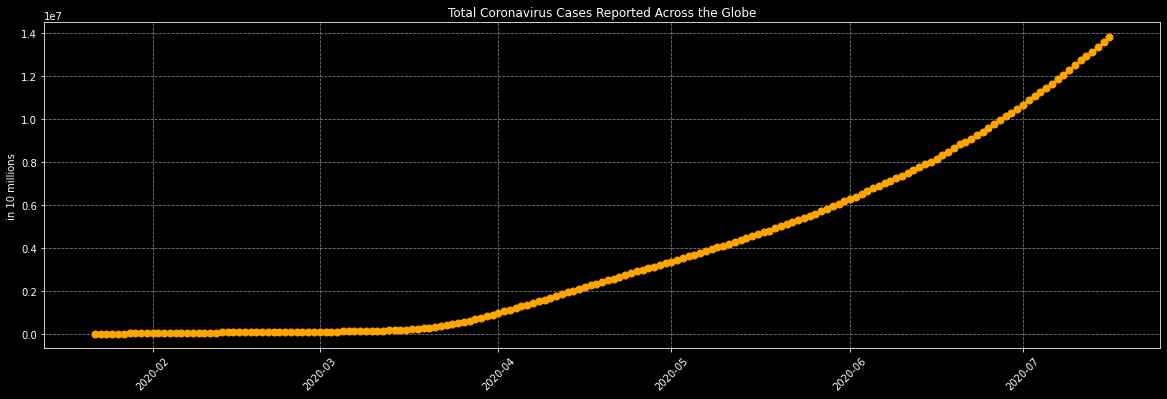

In [ ]:
# Student Action: Run the code below.
# Line plot for the total number of coronavirus confirmed cases reported across the world.
plt.style.use('dark_background')
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported Across the Globe')
plt.plot(global_cases.index, global_cases, c='orange', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.ylabel('in 10 millions')
plt.grid('major', linestyle='--', c='grey')
plt.show()

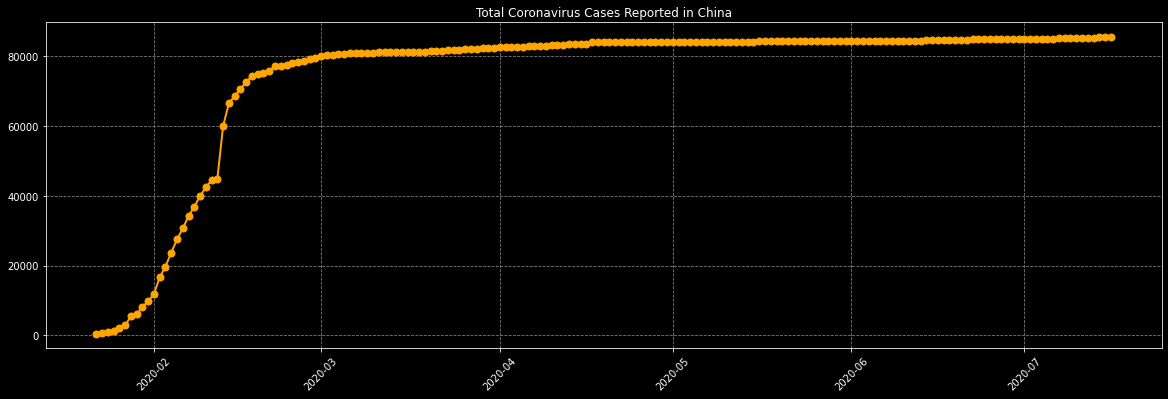

In [ ]:
# Student Action: Run the code below.
# Line plot for the total number of coronavirus confirmed cases reported in China only.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported in China')
plt.plot(china_cases.index, china_cases, c='orange', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.grid('major', linestyle='--', c='grey')
plt.show()

The curve flattens after 23 February 2020 because Wuhan (the capital of Hubei province in China) was put under total lockdown on 23 January 2020. As a result, the spread of the virus slowed down significantly.

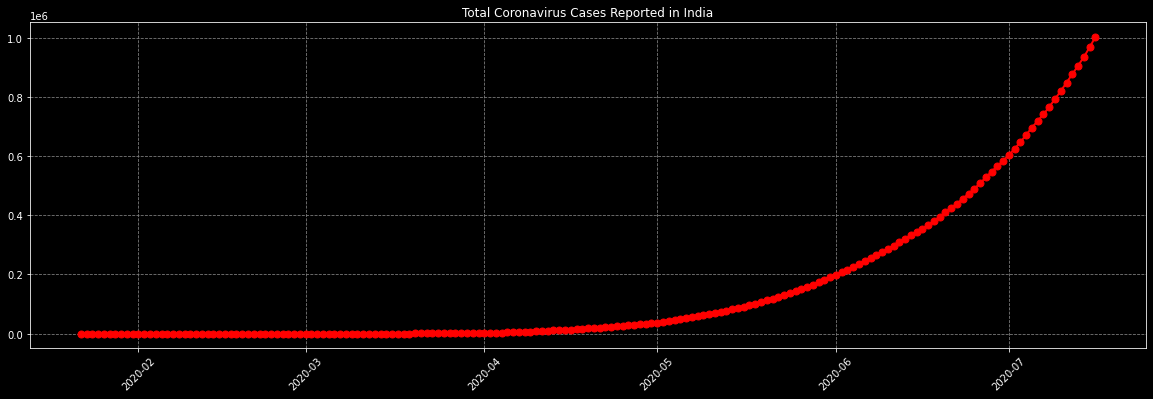

In [ ]:
# Student Action: Run the code below.
# Line plot for the total number of coronavirus confirmed cases reported in India only.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported in India')
plt.plot(india_cases.index, india_cases, c='r', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.grid('major', linestyle='--', c='grey')
plt.show()

India started testing for coronavirus in bulk in the last week of March 2020.

If you want to look at the trend of the coronavirus outbreak in India across all the states, then click on the link provided below.

[Ministry Of Health & Family Welfare](https://www.mohfw.gov.in/)

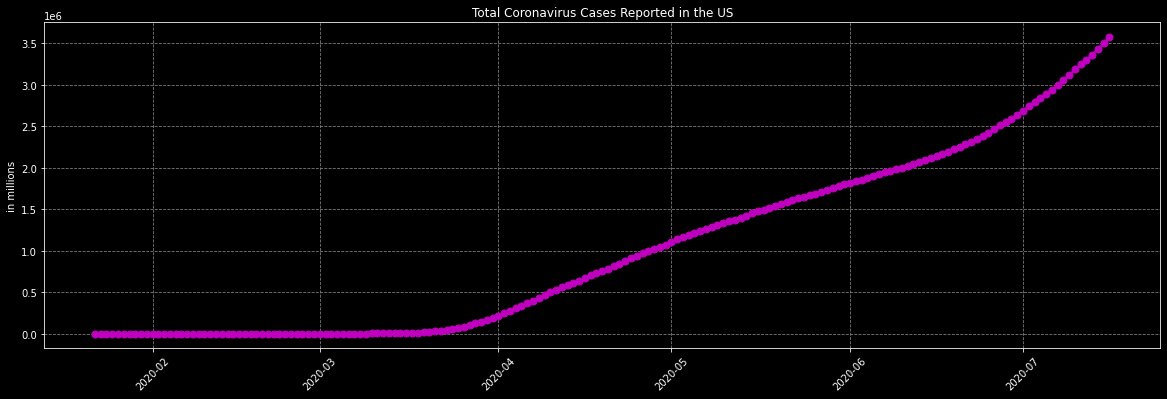

In [ ]:
# Student Action: Run the code below.
# Line plot for the total number of coronavirus confirmed cases reported in the US.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported in the US')
plt.plot(us_cases.index, us_cases, c='m', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.ylabel("in millions")
plt.grid('major', linestyle='--', c='grey')
plt.show()

The USA started testing for coronavirus in bulk after March 15, 2020.

---

#### Activity 4: Top 5 Worst Affected Countries

Let's identify the top 5 countries having the most number of confirmed coronavirus cases and visualise their trends starting from March 15, 2020 because that's when the USA started testing in bulk. Also, the USA has recorded the most number of coronavirus confirmed cases till date.

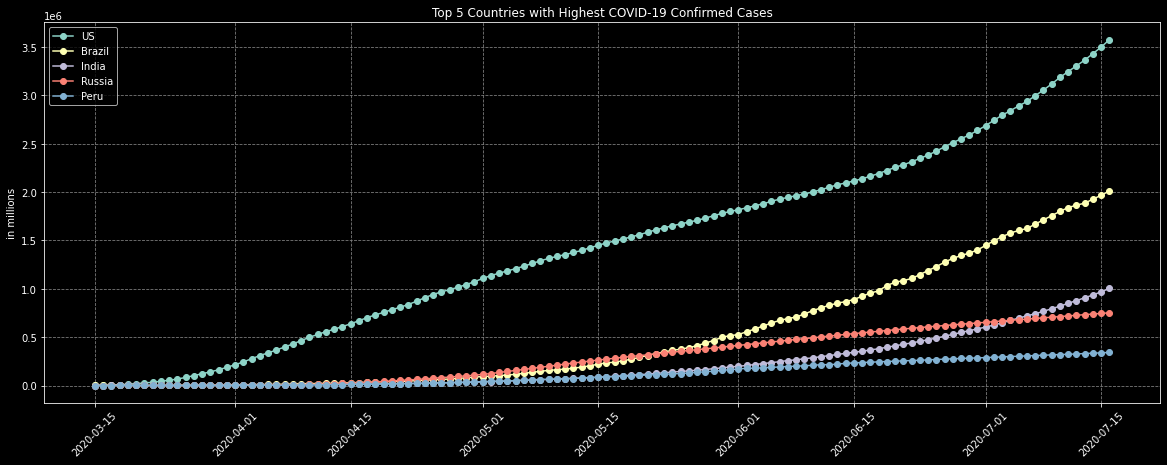

In [ ]:
# Student Action: Run the code below.
grouped_conf_df = conf_df.groupby(by='Country/Region', as_index=False).sum()
desc_grp_conf_df = grouped_conf_df.sort_values(by=conf_df.columns[-1], ascending=False)

# Top 5 countries with the highest number of coronavirus confirmed cases starting from March 15, 2020.
plt.figure(figsize = (20, 7))
plt.title('Top 5 Countries with Highest COVID-19 Confirmed Cases')
for region in desc_grp_conf_df.head()['Country/Region']:
  plt.plot(global_cases.index[53:], desc_grp_conf_df[desc_grp_conf_df['Country/Region'] == region].iloc[0, 56:], '-o', label = region)
plt.xticks(rotation = 45)
plt.ylabel("in millions")
plt.legend()
plt.grid('major', linestyle='--', c='grey')
plt.show()

---

#### Activity 5: Bivariate Bar Plots

Let's create a bar chart displaying the top 10 countries having the most number of coronavirus confirmed cases. 

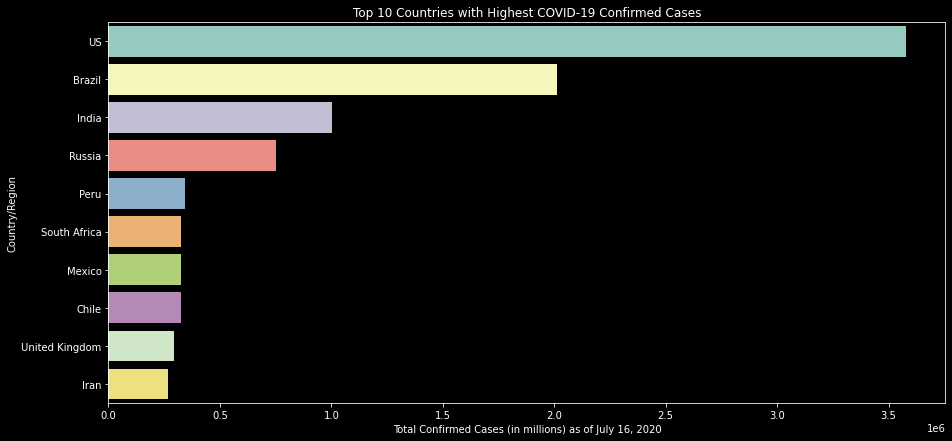

In [ ]:
# Student Action: Run the code below.
# Get the latest date.
last_col = conf_df.columns[-1]
# Modify the latest date in the 'Month DD, YYYY' format.
latest_date = datetime.datetime.strptime(last_col, '%m/%d/%y').strftime('%B %d, %Y')

# Create a bivariate bar chart displaying the top 10 countries having the most number of coronavirus confirmed cases.
plt.figure(figsize=(15, 7))
plt.title('Top 10 Countries with Highest COVID-19 Confirmed Cases')
sns.barplot(desc_grp_conf_df[last_col].head(10), desc_grp_conf_df['Country/Region'].head(10), orient='h')
plt.xlabel(f'Total Confirmed Cases (in millions) as of {latest_date}')
plt.show()

---

#### Activity 6: Cartogram (or Map) For China^

Let's create a cartogram to show the distribution of confirmed coronavirus cases in China and mark the affected regions of China with **circular** location markers.

The markers will display the name of the region location along with the number of confirmed coronavirus cases in that region.

In [ ]:
# Student Action: Run the code below.
# Map to show the distribution of confirmed coronavirus cases in China (circular markers).
conf_china_df = conf_df[conf_df['Country/Region'] == 'China']

china_map = folium.Map(location=[30.9756, 112.2707], width='100%', height='90%', tiles='Stamen Toner', zoom_start=4.5)
for i in conf_china_df.index:
  folium.Circle(radius=int(conf_china_df.loc[i, last_col]) * 2,
                location=[conf_china_df.loc[i, 'Lat'], conf_china_df.loc[i, 'Long']],
                popup= conf_china_df.loc[i, 'Province/State'] + "\n" + str(conf_china_df.loc[i, last_col]),
                color='crimson', fill=True, fill_color='crimson').add_to(china_map)
china_map

We know for sure that the Hubei region was affected the most in China; almost 50 times the second most affected region which is why Hubei region was put under the strict lockdown. The entire region was completely disconnected from all other regions. Nobody was allowed to go outside their homes. Hence, the virus didn't spread at higher pace in other regions of China because of which the circles for the other regions are very small compared to the circle for the Hubei region.

---

#### Activity 7: Cartogram For World

Let's create a cartogram to show the distribution of confirmed coronavirus cases across the world and mark the affected regions in the world with **circular** location markers.

The markers will display the name of the region location along with the number of confirmed coronavirus cases in that region.

In [ ]:
# Student Action: Run the code below.
# Map to show the distribution of confirmed coronavirus cases across the world (circular markers).
world_map = folium.Map(location=[0, 0], width='100%', height='80%', tiles='Stamen Toner', zoom_start=2.25)
for i in conf_df.index:
  folium.Circle(location=[conf_df.loc[i, 'Lat'], conf_df.loc[i, 'Long']], 
                radius=int(conf_df.loc[i, last_col]) / 2, 
                popup=conf_df.loc[i, 'Country/Region'] + '\n' + str(conf_df.loc[i, last_col]),
                color='crimson', fill=True, fill_color='crimson').add_to(world_map)
world_map

---

#### Activity 8: Cartogram For The USA

Let's also create a cartogram specifically for the United States for America.

In [ ]:
# Student Action: Run the code below.
# Map to show the distribution of confirmed coronavirus cases across the USA (circular markers).
us_conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
us_conf_df = pd.read_csv(us_conf_csv)
us_conf_df = us_conf_df.dropna()

us_map = folium.Map(location=[39.381266, -97.922211], width='100%', height='80%', tiles='Stamen Toner', zoom_start=4)
for i in us_conf_df.index:
  folium.Circle(location=[us_conf_df.loc[i, 'Lat'], us_conf_df.loc[i, 'Long_']], 
                radius=int(us_conf_df.loc[i, last_col]), 
                popup=us_conf_df.loc[i, 'Province_State'] + '\n' + str(us_conf_df.loc[i, last_col]),
                color='crimson', fill=True, fill_color='crimson').add_to(us_map)
us_map

Most number of the confirmed cases are recorded in the eastern region in the USA. Also, New York is the most affected city in the USA.

---

#### Activity 9: Daily (Non-Cumulative) Confirmed Cases^^^

Let's identify the countries having the lowest number of daily (or non-cumulative) coronavirus confirmed cases to further identify the countries that have contained the spread of the virus or in other words, countries that have flattened the curve.

**Q:** What should be the logic to identify the countries that have flattened the curve?

**Q:** What should be the logic to calculate the non-cumulative confirmed coronavirus cases starting from January 22, 2020?


In [ ]:
# Student Action: Run the code below.
non_cum_conf_df = desc_grp_conf_df.iloc[:, :4]

for i in range(len(desc_grp_conf_df.columns[3:]) - 1):
  series = desc_grp_conf_df[desc_grp_conf_df.columns[3 + (i + 1) ]] - desc_grp_conf_df[desc_grp_conf_df.columns[3 + i]]
  non_cum_conf_df[desc_grp_conf_df.columns[3 + (i + 1)]] = series 

non_cum_conf_df.head()

Country/Region        Lat        Long  ...  7/14/20  7/15/20  7/16/20
174             US  40.000000 -100.000000  ...    67417    67328    77255
23          Brazil -14.235000  -51.925300  ...    41857    39924    45403
79           India  20.593684   78.962880  ...    29429    32676    34975
140         Russia  61.524010  105.318756  ...     6240     6410     6415
134           Peru  -9.190000  -75.015200  ...     3744     3884     3835

[5 rows x 180 columns]

Let's create line plots for the top 4 worst affected countries to visualise the trends for the daily (non-cumulative) confirmed cases.

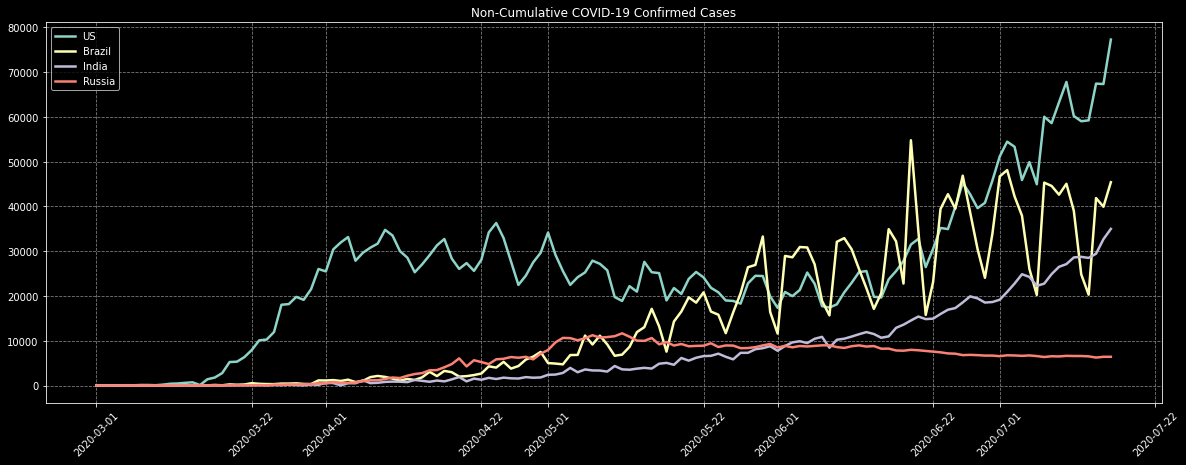

In [ ]:
# Student Action: Run the code below.
# Plot the first four countries having daily (non-cumulative) confirmed cases in the above DataFrame.
plt.figure(figsize=(20, 7))
plt.title('Non-Cumulative COVID-19 Confirmed Cases')
for region in non_cum_conf_df.iloc[:4, :]['Country/Region']:
  plt.plot(global_cases.index[39:], non_cum_conf_df[non_cum_conf_df['Country/Region'] == region].iloc[0, 42:], lw=2.5, label=region)
plt.xticks(rotation=45)
plt.legend()
plt.grid('major', linestyle='--', c='grey')
plt.show()

**Q:** From the above graph, identify the countries having the lowest daily confirmed cases?

---

#### Activity 10: Flattened Curves^^

Let's create a list of countries that have flattened the curve. Ideally, to flatten the curve, the non-cumulative cases for each day should be 0. But in a practical sense, from the point-of-view of healthcare facilities in a country, let's assume that on an average a country can handle 50 coronavirus cases every day.

So, to find the countries that have flattened the curve, let's calculate the sum of daily coronavirus confirmed cases for each country for 14 days. If the sum of daily coronavirus confirmed cases for the last 14 days is at most 700, then we can say that the country has flattened the curve. 

In [ ]:
# Student Action: Run the code below.
# List of countries that have flattened the curve.
countries = []
for i in non_cum_conf_df.index:
  last_14_days = []
  for j in range(14):
    last_14_days.append(non_cum_conf_df.loc[i, non_cum_conf_df.columns[-(j + 1)]])
  if sum(last_14_days) <= 700:
    countries.append(non_cum_conf_df.loc[i, 'Country/Region'])
countries

['China',
 'Ireland',
 'Denmark',
 'Norway',
 'Malaysia',
 'Finland',
 'Tajikistan',
 'Gabon',
 'Djibouti',
 'Central African Republic',
 'Hungary',
 'Greece',
 'Thailand',
 'Nicaragua',
 'Somalia',
 'Equatorial Guinea',
 'Maldives',
 'Sri Lanka',
 'Cuba',
 'Mali',
 'South Sudan',
 'Estonia',
 'Slovakia',
 'Iceland',
 'Guinea-Bissau',
 'Lithuania',
 'Slovenia',
 'Zambia',
 'Cabo Verde',
 'Sierra Leone',
 'Yemen',
 'Eswatini',
 'New Zealand',
 'Rwanda',
 'Benin',
 'Mozambique',
 'Tunisia',
 'Montenegro',
 'Jordan',
 'Latvia',
 'Niger',
 'Liberia',
 'Uganda',
 'Burkina Faso',
 'Cyprus',
 'Uruguay',
 'Georgia',
 'Suriname',
 'Chad',
 'Andorra',
 'Jamaica',
 'Togo',
 'Sao Tome and Principe',
 'Diamond Princess',
 'San Marino',
 'Malta',
 'Angola',
 'Botswana',
 'Tanzania',
 'Syria',
 'Taiwan*',
 'Vietnam',
 'Mauritius',
 'Burma',
 'Comoros',
 'Guyana',
 'Burundi',
 'Mongolia',
 'Lesotho',
 'Eritrea',
 'Cambodia',
 'Brunei',
 'Trinidad and Tobago',
 'Bahamas',
 'Monaco',
 'Seychelles',
 'Ba

Let's create line plots to visualise the total confirmed cases for the first 10 countries in the above list.

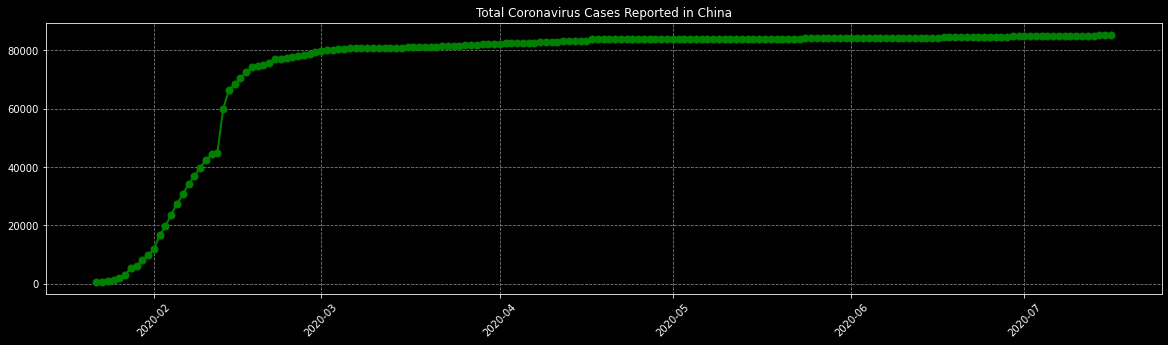

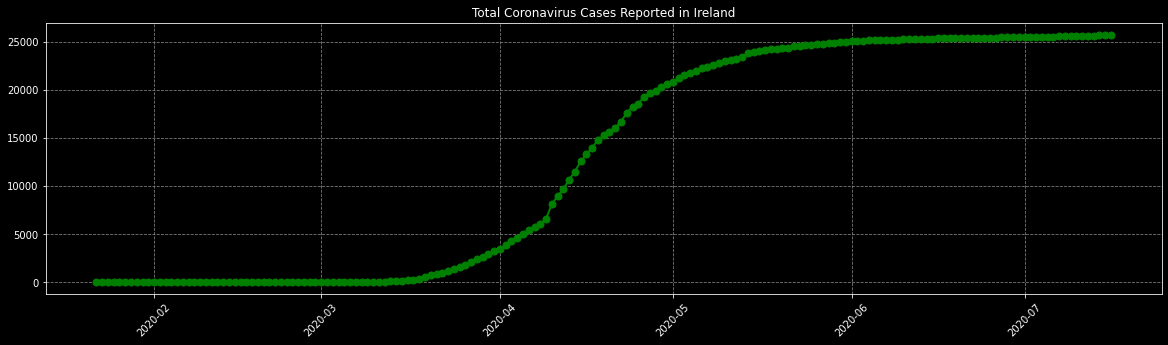

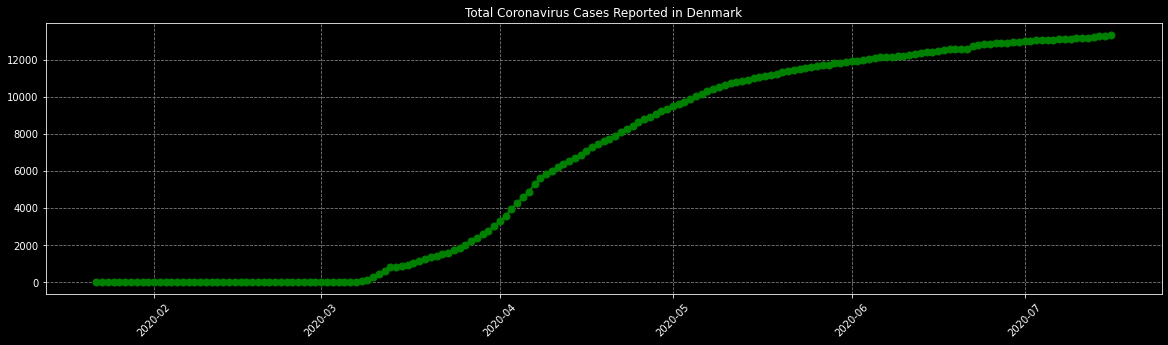

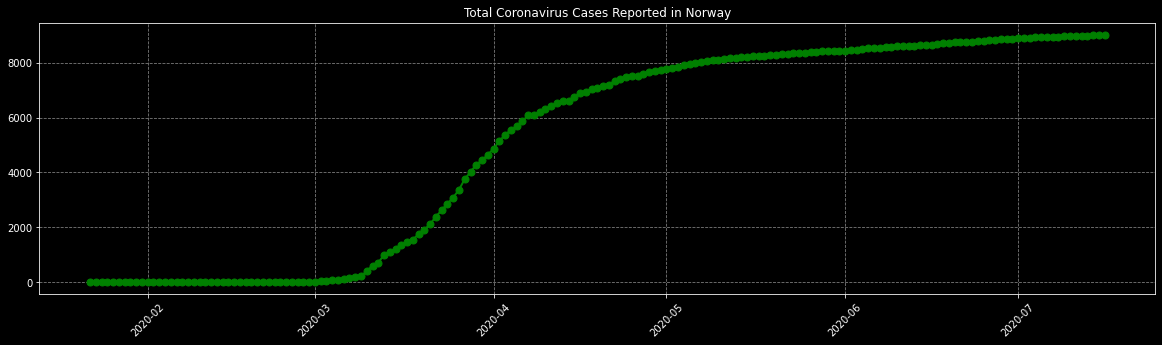

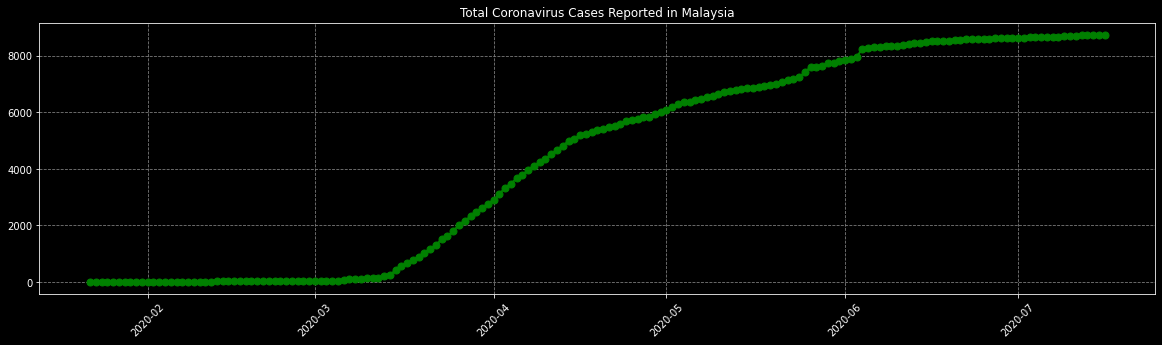

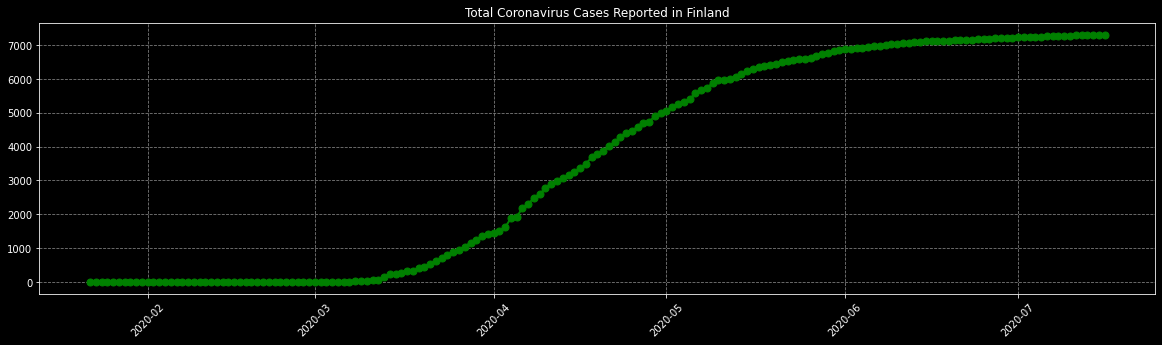

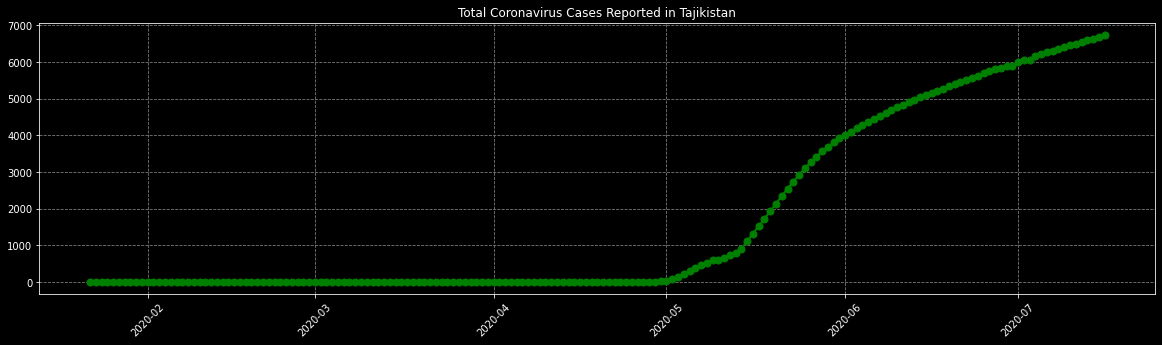

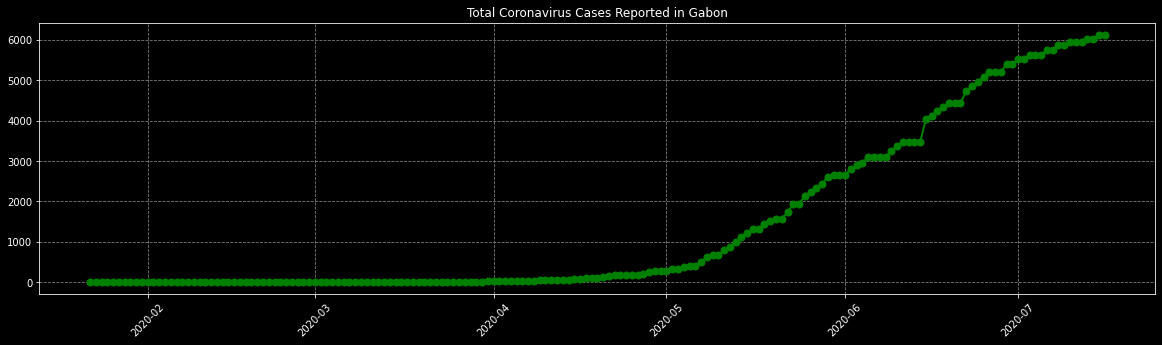

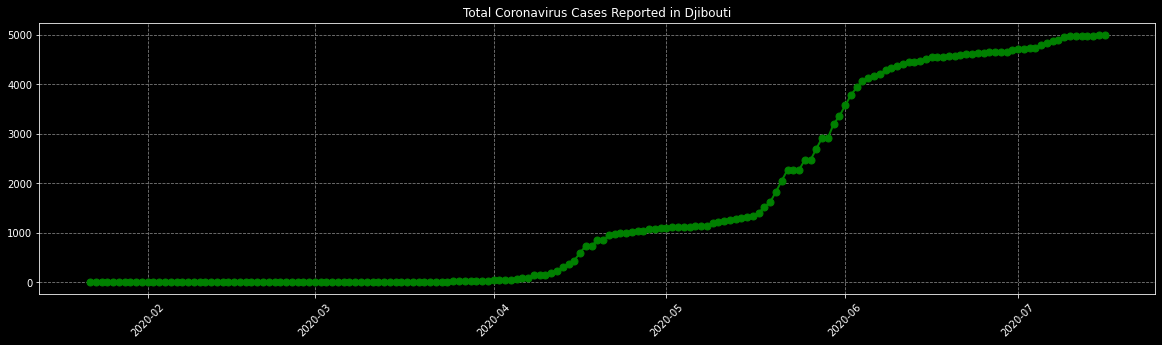

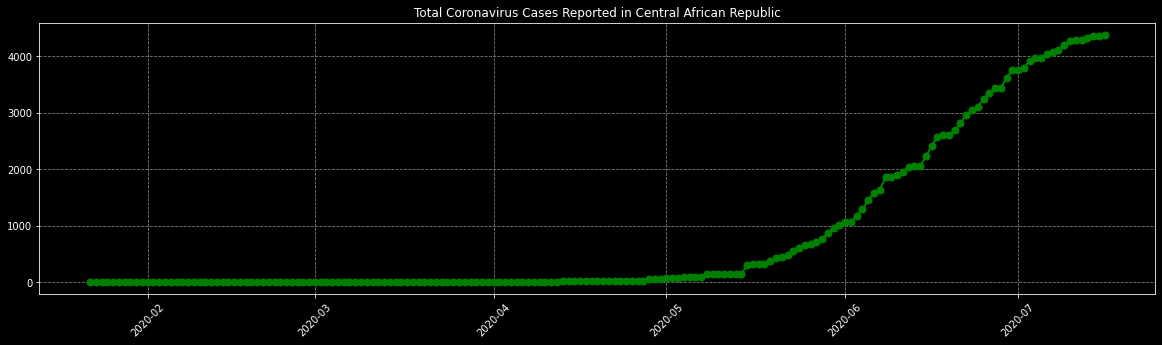

In [ ]:
# Student Action: Run the code below.
# Line plot for the total number of coronavirus confirmed cases reported in the countries that have flattened the curve.
def flattened_curve(country_list):
  for country in country_list: 
    country_cases = conf_df[conf_df['Country/Region'] == country].iloc[:, 4:].apply(sum, axis=0)
    country_cases.index = pd.to_datetime(country_cases.index)

    plt.figure(figsize=(20, 5))
    plt.title(f'Total Coronavirus Cases Reported in {country}')
    plt.plot(country_cases.index, country_cases, c='g', linewidth=2, marker='o', markersize=7)
    plt.xticks(rotation=45)
    plt.grid('major', linestyle='--', c='grey')
    plt.show()

flattened_curve(countries[:10])

We analysed only the confirmed cases. In the same way, you can analyse the deaths due to coronavirus data and number of people recovered from coronavirus data.

---
